# NBA Shot Chart Visualization

Shows a visual representation of a player's field goal attempts (made and missed) over a specified time period.  

Time Periods:
- Single Game Date
- Season (year)
- Playoffs (year)

## Imports

- [json](https://docs.python.org/3/library/json.html)
- [requests](https://docs.python-requests.org/en/master/api/#request-sessions)
- [pandas](https://pandas.pydata.org)
- [seaborn](https://seaborn.pydata.org)
- [matplotlib](https://matplotlib.org)
- [nba_api](https://pypi.org/project/nba-api/)
- [IPython](https://ipython.readthedocs.io/en/stable/api/index.html)
- [PIL](https://pillow.readthedocs.io/en/stable/)

In [10]:
# Imports
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from nba_api.stats.endpoints import shotchartdetail
from IPython.display import Image
from PIL import Image

## Drawing Court

In [3]:
Image(url='../Images/court-dimensions.jpeg')

**1 ft = 10 units on plot**

In [12]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # Use current axis if none provided
    if ax is None:
        ax = plt.gca()

    # Rim
    # Circle (diameter) = 18 in = 7.5 units
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Backboard
    # Rectangle = 6ft = 60 units 
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # Free Throw Lane
    # Outer Box
    # Rectangle = 16ft x 19ft = 160 units x 190 units
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    # Inner Box
    # Rectangle = 12ft x 19ft = 120 units x 190 units
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    
    # Free Throw Arc (Top)
    # Arc = 12ft x 12ft = 120 units x 120 units
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Free Throw Arc (Bottom)
    # Arc = 12ft x 12ft = 120 units x 120 units
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    
    # Restricted Zone
    # Arc = 8ft x 8ft = 80 units x 80 units
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # 3pt Line
    # Rectangles x2 = 14ft in height = 140 units
    corner1 = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner2 = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    
    # 3pt Arc
    # Arc = 47.5ft x 47.5ft = 475 units x 475 units
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    
    # Center Court
    # Outer Arc
    # Arc = 12ft x 12ft = 120 units x 120 units
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Inner Arc
    # Arc = 4ft x 4ft = 40 units x 40 units
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner1,
                      corner2, three_arc, center_outer_arc,
                      center_inner_arc]

    # Draw out of bounds line
    # Rectangle = 50ft x 47.5 ft = 500 units x 475 units
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        
#     ax.add_artist(AnnotationBbox(OffsetImage(get_player_img(get_player_id('Joel', 'Embiid')) ),
#                                 (500, 400),
#                                 frameon=False))
    

#     get_player_img(get_player_id('Joel', 'Embiid'))    
    
    return ax

<function matplotlib.pyplot.show(close=None, block=None)>

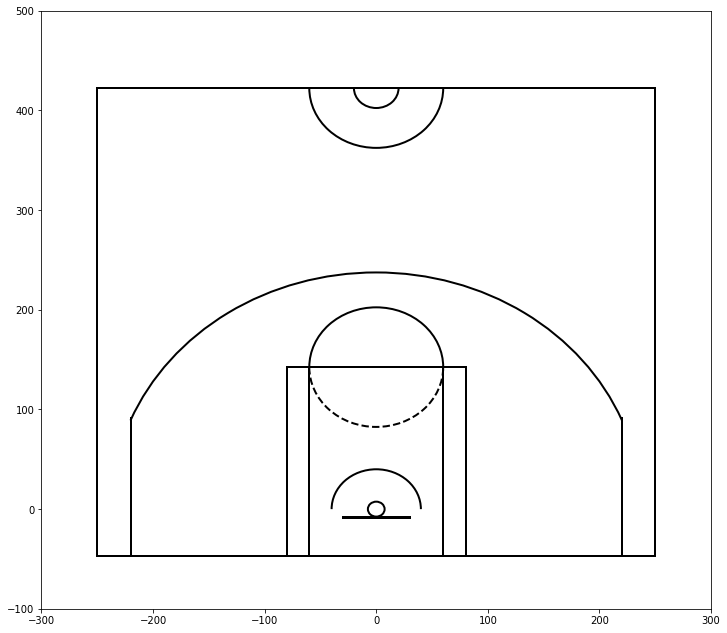

In [13]:
plt.figure(figsize=(12, 11))
draw_court(outer_lines=True, color='black')
# sns.scatterplot(x='LOC_X', y='LOC_Y', data=missed_shot_df, color='red')
# sns.scatterplot(x='LOC_X', y='LOC_Y', data=made_shot_df, color='green')
# get_player_img(get_player_id('Joel', 'Embiid'))
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.show